In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pickle
import matplotlib.patches as patches

#plot parameters
font_size=10
plt.style.use('seaborn-paper')
plt.rc('text', usetex=True)
plt.rc('font',family='serif',serif='Computer Modern')
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('legend', fontsize=font_size-1)

#color list
color_list = ["#c7e9b4","#7fcdbb","#41b6c4","#1d91c0","#225ea8", "#0c2c84"]
newcm = LinearSegmentedColormap.from_list('ColorMap',
                                          list(reversed(color_list[:-1])))

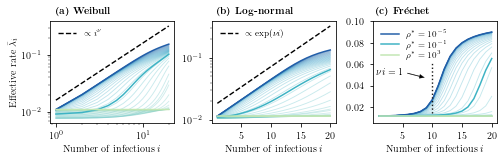

In [27]:
#plot
width = 7.057
height = width/3.3
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(width,height))

plt.subplots_adjust(left=0.1, bottom=0.22, right=0.98,
                    top=0.88, wspace=0.3, hspace=0.25)

pos = (0.02, 1.07) #title position
pos2 = (0.05, 1.12) #equation position

#left plot : weibull
#-------------------
with open('./stationary_rate/dat/stationary_effective_rate_weibull.pk','rb') as datafile:
    results = pickle.load(datafile)

ivec = results['ivec']
rho_vec = results['rho_vec']
eff_rate_vec = results['eff_rate_vec']
for j,rho in enumerate(rho_vec):
    if rho in results['special_rho_list']:
        alpha = 1
        label = None
        zorder=2
        lw=1.5
    else:
        alpha = 0.3
        label = None
        zorder=0
        lw=0.9
    axes[0].loglog(ivec,eff_rate_vec[j],color=newcm(j/len(rho_vec)),
         alpha=alpha,label=label,zorder=zorder,lw=lw)
axes[0].loglog(ivec,0.016*ivec,'--',color='k',label=r"$\propto i^\nu$")
axes[0].legend(frameon=False, ncol=1, labelspacing=0.1)
# axes[0].set_ylabel(r"Effective rate $\bar{\lambda}_i^*$")
axes[0].set_ylabel(r"Effective rate $\bar{\lambda}_{i}$")
axes[0].set_xlabel(r"Number of infectious $i$")
axes[0].text(pos2[0], pos[1], r'\textbf{(a) Weibull}', fontsize=font_size,
            transform=axes[0].transAxes)

#center plot : lognormal
#-------------------
with open('./stationary_rate/dat/stationary_effective_rate_lognormal.pk','rb') as datafile:
    results = pickle.load(datafile)

ivec = results['ivec']
rho_vec = results['rho_vec']
eff_rate_vec = results['eff_rate_vec']
for j,rho in enumerate(rho_vec):
    if rho in results['special_rho_list']:
        alpha = 1
        label = None
        zorder=2
        lw=1.5
    else:
        alpha = 0.3
        label = None
        zorder=0
        lw=0.9
    axes[1].semilogy(ivec,eff_rate_vec[j],color=newcm(j/len(rho_vec)),
         alpha=alpha,label=label,zorder=zorder,lw=lw)
axes[1].semilogy(ivec,0.016*np.exp(0.15*ivec),'--',color='k',label=r"$\propto \exp (\nu i )$")
leg = axes[1].legend(frameon=True, ncol=1, labelspacing=0.1)
leg.get_frame().set_linewidth(0.0)
axes[1].set_xlabel(r"Number of infectious $i$")
axes[1].set_xticks([5,10,15,20])
axes[1].text(0.04, pos[1], r'\textbf{(b) Log-normal}', fontsize=font_size,
            transform=axes[1].transAxes)

#right plot : Fréchet
#---------------------
with open('./stationary_rate/dat/stationary_effective_rate_frechet.pk','rb') as datafile:
    results = pickle.load(datafile)

ivec = results['ivec']
rho_vec = results['rho_vec']
eff_rate_vec = results['eff_rate_vec']
for j,rho in enumerate(rho_vec):
    if rho in results['special_rho_list']:
        alpha = 1
        # label = None
        exponent = "{" + f"{int(np.log10(rho))}" + "}"
        label = fr"$\rho^* = 10^{exponent}$"
        zorder=2
        lw=1.5
    else:
        alpha = 0.3
        label = None
        zorder=0
        lw=0.9
    axes[2].plot(ivec,eff_rate_vec[j],color=newcm(j/len(rho_vec)),
             alpha=alpha,label=label,zorder=zorder,lw=lw)

#add an arrow + text
style = "Simple, tail_width=0.5, head_width=4, head_length=5"
kw = dict(arrowstyle=style, color="k")
a1 = patches.FancyArrowPatch((5.5, 0.052), (9, 0.047),
                             connectionstyle="arc3,rad=-.0",**kw)
axes[2].add_patch(a1)
axes[2].text(0.5, 0.05, r'$\nu i = 1$', fontsize=font_size)

#add vertical line
axes[2].axvline(10,0.1,0.6,ls=':',color='#1a1a1a')

leg = axes[2].legend(frameon=True, ncol=1, labelspacing=0.1, loc='upper left', framealpha=0.)
leg.get_frame().set_linewidth(0.0)
axes[2].set_xlabel(r"Number of infectious $i$")
axes[2].text(0.02, pos[1], r'\textbf{(c) Fréchet}', fontsize=font_size,
            transform=axes[2].transAxes)
axes[2].set_xticks([5,10,15,20])

axes[2].set_ylim([0.005,0.1])

plt.savefig('./figs/stationary_effective_rate.pdf')

In [21]:
help(plt.axvline)

Help on function axvline in module matplotlib.pyplot:

axvline(x=0, ymin=0, ymax=1, **kwargs)
    Add a vertical line across the Axes.
    
    Parameters
    ----------
    x : float, default: 0
        x position in data coordinates of the vertical line.
    
    ymin : float, default: 0
        Should be between 0 and 1, 0 being the bottom of the plot, 1 the
        top of the plot.
    
    ymax : float, default: 1
        Should be between 0 and 1, 0 being the bottom of the plot, 1 the
        top of the plot.
    
    Returns
    -------
    `~matplotlib.lines.Line2D`
    
    Other Parameters
    ----------------
    **kwargs
        Valid keyword arguments are `.Line2D` properties, with the
        exception of 'transform':
    
        Properties:
        agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
        alpha: scalar or None
        animated: bool
        antialiased or aa: bool
        clip_box: `.Bbox`
